In [ ]:
#feature extraction pca 
#to remove unnecessary feature
#higher dimentional data to low dimension data with inheritance

In [71]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt


In [72]:
pr = pd.read_csv('mnist.csv')

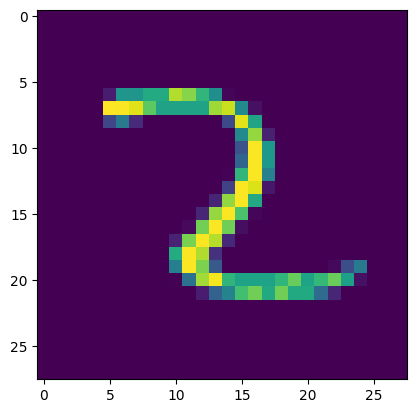

In [73]:
#pr.head()
plt.imshow(pr.iloc[2500,1:].values.reshape(28,28))

In [74]:
x = pr.iloc[:,1:]
y = pr.iloc[:,0]

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [77]:
x_train.shape

(2000, 784)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [79]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [80]:
#printing time for execution time
import time 
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() -start)

1.0010900497436523


In [95]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.91425

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [104]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [117]:
# pca 

from sklearn.decomposition import PCA
pca = PCA(n_components=150)


In [118]:
x_train_transform = pca.fit_transform(x_train)
x_test_transform = pca.transform(x_test)

In [119]:
x_train_transform.shape


(2000, 150)

In [120]:
knn = KNeighborsClassifier()

knn.fit(x_train_transform,y_train)

KNeighborsClassifier()

In [121]:
y_pred = knn.predict(x_test_transform)

In [ ]:
accuracy_score(y_test,y_pred)

0.885625


In [ ]:
# runing the pca for all component

for i in range(1, 780):
    pca = PCA(n_components=i)

    x_train_transform = pca.fit_transform(x_train)
    x_test_transform = pca.transform(x_test)

    knn = KNeighborsClassifier()

    knn.fit(x_train_transform,y_train)

    y_pred = knn.predict(x_test_transform)

    print(accuracy_score(y_test,y_pred))
    
    
    

0.261875
0.33875
0.46975
0.622625


In [145]:
# transforming a data to 2d 

pca = PCA(n_components=2)
x_train_transform = pca.fit_transform(x_train)
x_test_transform = pca.transform(x_test)

x_train_transform.shape

(2000, 2)

In [146]:
import plotly.express as px

y_train_transform = y_train.astype(str)
fig = px.scatter(x = x_train_transform[:,0],
                 y=x_train_transform[:,1],
                 color=y_train_transform,
                 color_discrete_sequence=px.colors.qualitative.Vivid)

fig.show()

In [151]:
# transforming data into 3d
pca = PCA(n_components=3)
x_train_transform = pca.fit_transform(x_train)
x_test_transform = pca.transform(x_test)

x_train_transform.shape

(2000, 3)

In [154]:

y_train_transform = y_train.astype(str)
fig = px.scatter_3d(x = x_train_transform[:,0],
                 y= x_train_transform[:,1],
                 z = x_train_transform[:,2] 
                 ,color=y_train_transform)

fig.update_layout(margin = dict(l=20,r=20,t=20,b=20))

fig.show()